<div align="center"> <h1>Reading and Exploring Data</h1>
    <h2><a href="...">Richard Leibrandt</a></h2>
</div>

*scikit-learn* is a python package that has a complete collection of tools and models for machine learning and data mining.

From pre-processing to predicting, *scikit-learn* offers a consistent work flow that makes it very easy to experiment new models.

In this example we use a data set created by Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu). It lists features of cars and their price. Suppose that we want to predict the price of a car.

In machine learning the following terminology is often used:

* "features" / "Independent variables" - The variables used to predict something, i.e., the columns in our Dataframe. We later also denote it with `X`.
* "target" - The variable we want to predict (also one of the columns of the Dataframe). We later also denote it with `y`.
* "observations" / "data points" / "items" - Each of the individual data points, i.e., the rows in the Dataframe.

# Reading Data from CSV

Let's load the dataset:

In [1]:
import pandas as pd
import numpy as np

In [2]:
car_prices=pd.read_csv("../data/car_prices.csv")

# Exploration

In [3]:
car_prices.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


We have 204 observations of 25 features. The target feature is the 'price'.

We can see the data types of each column:

In [5]:
car_prices.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

For this example we will keep only some of the numeric columns:

In [5]:
features = car_prices[['length', 'width', 'height', 'engine-size',  'stroke', 'compression-ratio', 'horsepower', 'price']]
features = features.replace('?', '', regex=False)
features = features.apply(pd.to_numeric, errors='coerce')
print(features.dtypes)

length               float64
width                float64
height               float64
engine-size            int64
stroke               float64
compression-ratio    float64
horsepower           float64
price                float64
dtype: object


Let's take a look at the histograms of the features:

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

     variable    value
0      length    168.8
1      length    168.8
2      length    171.2
3      length    176.6
4      length    176.6
...       ...      ...
1635    price  16845.0
1636    price  19045.0
1637    price  21485.0
1638    price  22470.0
1639    price  22625.0

[1640 rows x 2 columns]


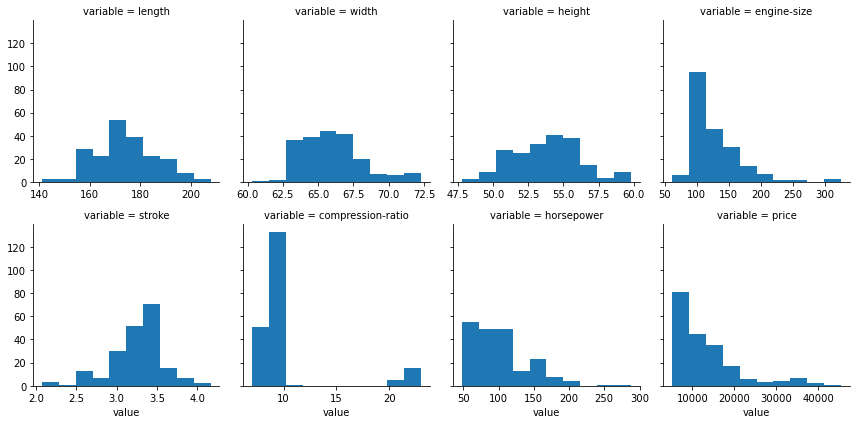

In [7]:
# VISUALISATION
long_feat = pd.melt(features, value_vars=['length', 'width', 'height', 'engine-size', 'stroke', 'compression-ratio', 'horsepower', 'price'])
print(long_feat)
fg = sns.FacetGrid(long_feat, col="variable", col_wrap=4, sharex=False)
fg = fg.map(plt.hist, "value" )

# Reading and Exploring Build-in Data

In [8]:
# We load the data "boston"
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()
print(boston['DESCR'])
boston.data

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
# We build the data into a DataFrame
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target

We look at the data and let pandas provide us with statistics:

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
# We separate the data into input and output data (independent variables / dependent variables) 
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
# is the same as:
(X, y) = (data.iloc[:, :-1], data.iloc[:, -1])
# is the same as:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

# We could have done it like that:
X = boston.data
y = boston.target